In [63]:
import ImbalancedLearningRegression as iblr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import smogn

In [87]:
data = pd.read_csv('FireBrigadeAgent_410064826_training_data.csv')

In [88]:
data.shape

(10081, 10)

In [89]:
data.head()

,fieryness_x,temperature_x,brokenness_x,building_code_x,fire_index_x,fieryness_y,temperature_y,brokenness_y,building_code_y,fire_index_y
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [90]:
data['fieryness_x'].unique()

array([0, 1, 3, 2])

In [108]:
rg_mtrx = [
    [0, 0, 0],  ## under-sample
    [1, 1, 0],  ## over-sample
    [2, 1, 0],  ## over-sample
    [3, 1, 0],  ## over-sample
    [4, 0.5, 0],  ## under-sample
    [5, 0.5, 0],  ## under-sample
    [6, 0.5, 0],  ## under-sample
    [7, 0.2, 0],  ## under-sample
    [8, 0.2, 0],  ## under-sample
]
data_smogn=smogn.smoter(data=data,y='fieryness_x', rel_thres=0.5, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|####################################################################################| 5/5 [00:00<00:00, 1379.80it/s]


<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

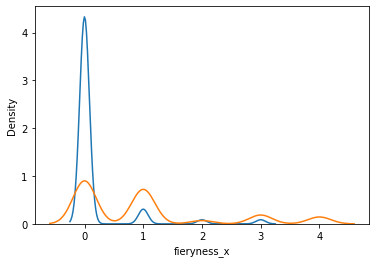

In [109]:
data_smogn = data_smogn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_smogn['fieryness_x'], label='modified')

<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

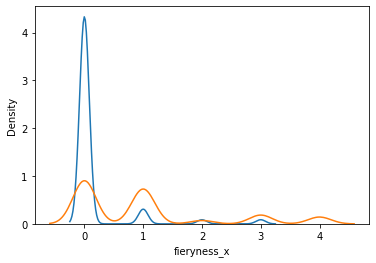

In [92]:
data_smogn = data_smogn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_smogn['fieryness_x'], label='modified')

In [93]:
data_smogn.shape

(9074, 11)

In [94]:
data.shape

(10081, 10)

In [106]:
data_ro = iblr.ro(data=data,y='fieryness_x', rel_thres=1., rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|##############################################################################| 4033/4033 [00:00<00:00, 8940.05it/s]


<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

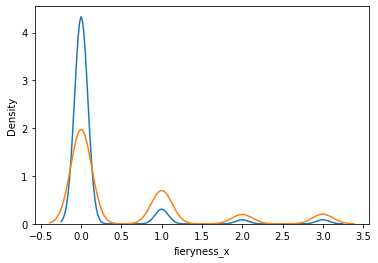

In [107]:
data_ro = data_ro.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_ro['fieryness_x'], label='modified')

In [97]:
data_gn = iblr.gn(data=data,y='fieryness_x', rel_thres=0.5, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|#####################################################################################| 5/5 [00:00<00:00, 558.27it/s]


<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

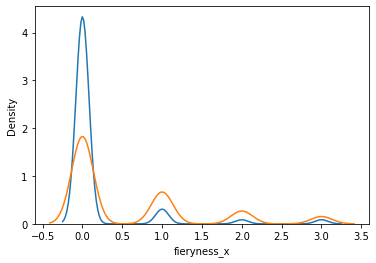

In [98]:
data_gn = data_gn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_gn['fieryness_x'], label='modified')

In [99]:
data_ro.shape

(14114, 11)

In [100]:
data_gn.shape

(10080, 11)

In [101]:
data_smogn.shape

(9074, 11)

In [102]:
data_smote = iblr.smote(data=data,y='fieryness_x', rel_thres=0.5, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|####################################################################################| 5/5 [00:00<00:00, 1600.51it/s]


<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

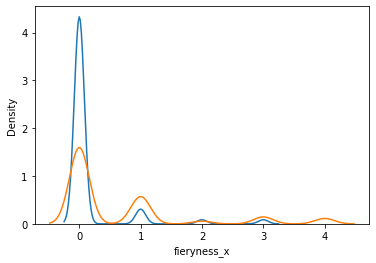

In [103]:
data_smote = data_smote.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_smote['fieryness_x'], label='modified')